Assignment 1: Predict diabetes using Perceptron
Student: Pujan Maharjan (a1863495)
Course: Deep Learning Fundamentals

In [101]:
# !pip install ipywidgets
# !pip install seaborn


2
4


In [104]:
import torch
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# !pip install ipywidgets
sns.set()


In [11]:
# Understand Data
X, y = load_svmlight_file("diabetes.txt")
X = X.toarray()
# reshape y from (768,) to (768,1)
y = y.reshape(-1, 1)
print('X : ', X.shape)
print('Y : ', y.shape)
all_data = np.append(X, y, axis=1)
print('all_data Shape ', all_data.shape)
columns = ['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin', 'BMI', 'Diabetes Pedigree', 'Age', 'Output']
df = pd.DataFrame(all_data, columns=columns)
df

X :  (768, 8)
Y :  (768, 1)
all_data Shape  (768, 9)


,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree,Age,Output
0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333,-1.0
1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667,1.0
2,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333,-1.0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000,1.0
4,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,-1.0
...,...,...,...,...,...,...,...,...,...
763,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000,1.0
764,-0.764706,0.226131,0.147541,-0.454545,-1.000000,0.096870,-0.776260,-0.800000,1.0
765,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000,1.0
766,-0.882353,0.266332,-0.016393,-1.000000,-1.000000,-0.102832,-0.768574,-0.133333,-1.0


In [107]:
print("Hello")

Hello


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,-0.547641,0.396421,-1.0,-0.882353,-0.647059,-0.294118,1.0
Glucose,768.0,0.215020,0.321333,-1.0,-0.005025,0.175879,0.409547,1.0
Blood Pressure,768.0,0.132877,0.317308,-1.0,0.016393,0.180328,0.311475,1.0
Skin Thickness,768.0,-0.585122,0.322267,-1.0,-1.000000,-0.535354,-0.353535,1.0
Insulin,768.0,-0.811349,0.272444,-1.0,-1.000000,-0.927896,-0.699173,1.0
BMI,768.0,-0.046421,0.234997,-1.0,-0.186289,-0.046200,0.090909,1.0
Diabetes Pedigree,768.0,-0.663641,0.282945,-1.0,-0.858455,-0.748506,-0.531811,1.0
Age,768.0,-0.591971,0.392008,-1.0,-0.900000,-0.733333,-0.333333,1.0
Output,768.0,0.302083,0.953903,-1.0,-1.000000,1.000000,1.000000,1.0


In [13]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnancies        768 non-null    float64
 1   Glucose            768 non-null    float64
 2   Blood Pressure     768 non-null    float64
 3   Skin Thickness     768 non-null    float64
 4   Insulin            768 non-null    float64
 5   BMI                768 non-null    float64
 6   Diabetes Pedigree  768 non-null    float64
 7   Age                768 non-null    float64
 8   Output             768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


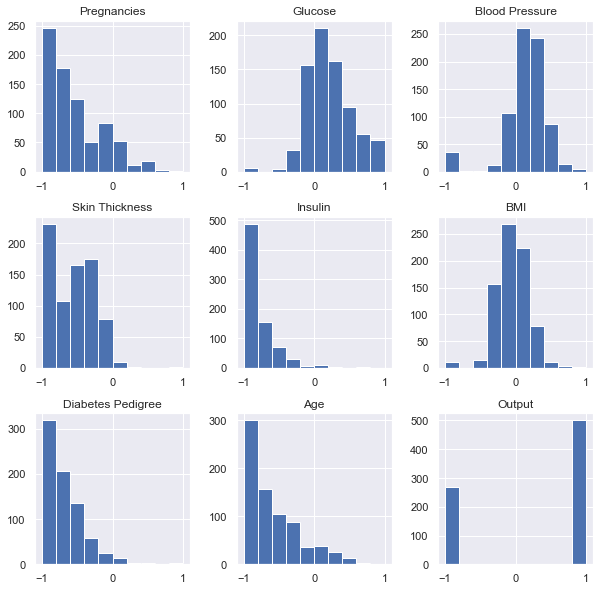

In [82]:
histogram = df.hist(figsize=(10,10))

In [14]:
print(df['Output'].value_counts())

 1.0    500
-1.0    268
Name: Output, dtype: int64


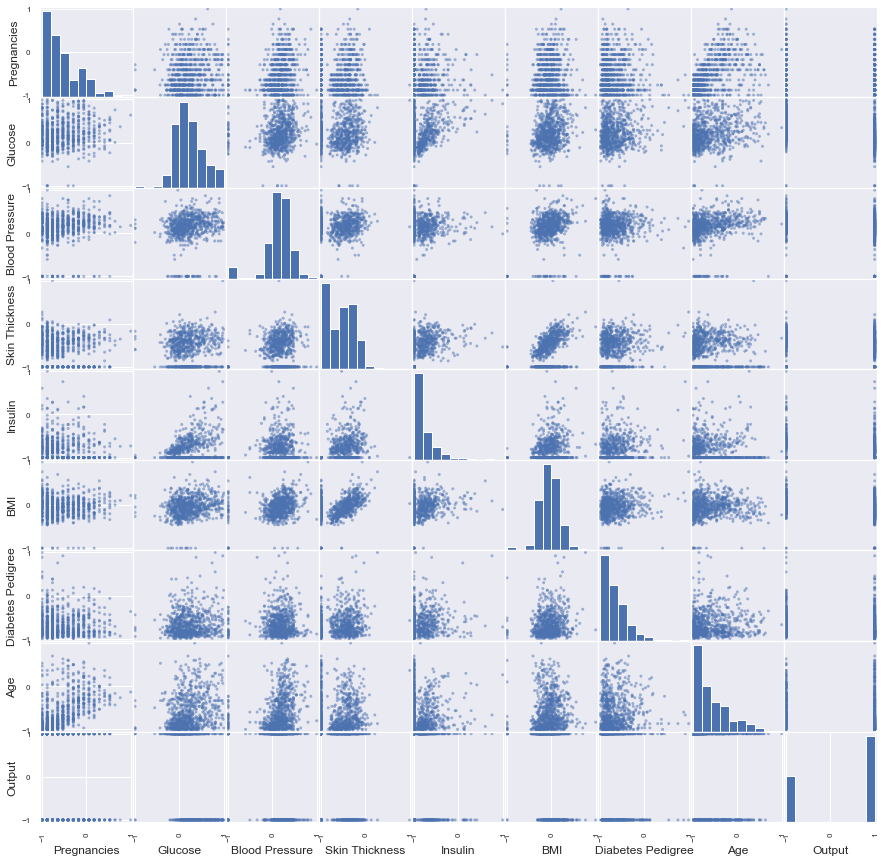

In [84]:
scatter_plot = scatter_matrix(df, figsize=(15,15))


In [115]:
class Perceptron():
    def __init__(self, 
        file_path, 
        weights, 
        loss_function_name, 
        learning_rate, 
        epoch,
        add_bias = False) -> None:
        self.file_path = file_path
        self.weights = weights
        self.loss_function_name = loss_function_name
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.add_bias = add_bias
        self.train_data = None
        self.epochs = []
        self.train_losses = []
        self.validation_losses = []        
        self.train_accuracies = []
        self.validation_accuracies = []
        self.train_validation_y_labels = ['Train', 'Validation']

    def get_features_labels_from_file_data(self):
        X, y = load_svmlight_file(self.file_path)
        # convert X from scipy.sparce.csr.csr_matrix to numpy array
        X = X.toarray()
        # reshape y from (768,) to (768,1)
        y = y.reshape(-1, 1)
        return X,y

    def predict(self, X):
        return np.sign(np.dot(X, self.weights))

    def zero_one_loss(self, X, y):
        # print('zero one loss X ', X.shape, ', w , ',self.weights.shape)
        xw = np.dot(X, self.weights)
        # xw = self.predict(X)
        # print('xw.shape ', xw.shape)
        losses = []
        # if correct prediction, then loss = 0, else loss = 1
        for i in range(len(y)):
            indicator = y[i] * xw[i]
            if indicator < 0:
                losses.append(1)
            else:
                losses.append(0)

        return np.array(losses).reshape(-1,1)

    def perceptron_loss(self, X, y):        
        x_w = np.dot(X, self.weights)
        # x_w = self.predict(X)
        # print('shape of xw ', x_w.shape)
        p_loss_mat = y * x_w
        # print('p_loss_mat shape ', p_loss_mat)
        #multiply by minus
        p_loss_mat = -p_loss_mat
        # print('negative p_loss_mat ', p_loss_mat)
        zero_column_matrix = np.zeros(p_loss_mat.shape[0]).reshape(-1,1)
        loss_matrix_with_zero_at_first_column = np.append(zero_column_matrix, p_loss_mat, axis=1)
        # print('loss_matrix_with_zero_at_first_column ', loss_matrix_with_zero_at_first_column)
        #find max in each row
        perceptron_loss_values = np.amax(loss_matrix_with_zero_at_first_column, axis=1).reshape(-1,1)
        # print('perceptron_loss_values ', perceptron_loss_values)
        # pujan_hello
        return perceptron_loss_values

    def normal_loss(self, X, y):
        normal_loss_values = self.predict(X) - y
        # print('normal loss values ', normal_loss_values)
        # should_break_here
        return normal_loss_values

    def normal_absolute_loss(self, X, y):
        normal_absolute_loss = abs(self.normal_loss(X,y))
        return normal_absolute_loss

    def mean_squared_error_loss(self, X, y):
        mse = (self.predict(X) - y) ** 2
        return mse

    def add_bias_in_features(self, X_for_bias):
        bias_X = np.ones((X_for_bias.shape[0],1))
        X_for_bias = np.append(bias_X, X_for_bias, axis=1)
        return X_for_bias
        
    def train(self, X_train, y_train, X_val, y_val):
        train_data = []
        if self.add_bias:
            X_train = self.add_bias_in_features(X_train)
            X_val = self.add_bias_in_features(X_val)
            bias_value = np.random.uniform(low=-.1,high=.1, size=1)
            print('Bias Value ', bias_value)
            bias_W = np.array([bias_value])
            # print('Shape of weights before bias ', self.weights.shape)
            self.weights = np.append(bias_W, self.weights, axis=0)
            # print('New shape of Weights : ', self.weights.shape)

        for epoch_number in range(self.epoch):
            # print('Epoch number: ', epoch_number)
            train_loss = None
            validation_loss = None
            train_accuracy = None
          
            if (self.loss_function_name == "zero_one_loss"):
                # print('zero one loss')
                train_loss = self.zero_one_loss(X_train, y_train)
                validation_loss = self.zero_one_loss(X_val, y_val)  
                                                                         
                
            elif self.loss_function_name == "perceptron_loss":
                # print('Perceptron loss')
                train_loss = self.perceptron_loss(X_train, y_train)
                validation_loss = self.perceptron_loss(X_val, y_val)

            elif self.loss_function_name == "normal_loss":
                train_loss = self.normal_loss(X_train, y_train)
                validation_loss = self.normal_loss(X_val, y_val)

            elif self.loss_function_name == "normal_absolute_loss":
                train_loss = self.normal_absolute_loss(X_train, y_train)
                validation_loss = self.normal_absolute_loss(X_val, y_val)

            elif self.loss_function_name == "mean_squared_error_loss":
                train_loss = self.mean_squared_error_loss(X_train, y_train)
                validation_loss = self.mean_squared_error_loss(X_val, y_val)
                
            yxlr = self.learning_rate * y_train * X_train * train_loss
            yxlr_sum = np.sum(yxlr, axis=0).reshape(-1,1)                
            self.weights = self.weights + yxlr_sum
            train_accuracy = self.accuracy(X_train, y_train)
                
            validation_accuracy = self.accuracy(X_val, y_val)
            # print('Epoch ', epoch_number, ', Val accuracy: ', validation_accuracy)
            train_loss_sum = np.sum(train_loss)
            validation_loss_sum = np.sum(validation_loss)
            self.epochs.append(epoch_number)
            self.train_losses.append(train_loss_sum)
            self.validation_losses.append(validation_loss_sum)
            self.train_accuracies.append(train_accuracy)
            self.validation_accuracies.append(validation_accuracy)
            train_data.append({
                'learning_rate': self.learning_rate, 
                'epoch': epoch_number, 
                'train_loss': train_loss_sum, 
                'validation_loss': validation_loss_sum,
                'validation_accuracy': validation_accuracy,
                'train_accuracy': train_accuracy})

        # print('Training Completed')
        self.train_data = train_data
        return train_data

    def accuracy(self, X_accuracy, y_accuracy):
        predictions_for_accuracy = self.predict(X_accuracy)
        accuracy_score_from_sk_learn = accuracy_score(y_accuracy, predictions_for_accuracy)
        return accuracy_score_from_sk_learn

    def split_train_validation_test(self, X, y):
        # reference to split (train/validation/test):
        #  https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
            test_size=0.2, 
            random_state=1, 
            shuffle=True,
            # stratify=y
            )
        # 0.25 * 0.8 = 0.2
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
            test_size=0.25, 
            random_state=1, 
            shuffle=True,
            # stratify=y_train
            )

        return X_train, X_val, X_test, y_train, y_val, y_test

    def plot_line_graphs(self, x_values, y_values_list, y_labels, title):
        for y_values, y_label in zip(y_values_list, y_labels):
            plt.plot(x_values, y_values, label = y_label)

        plt.legend()
        plt.title(title)
        plt.show()

    def plot_loss_curves(self, title_suffix):        
        y_values_list = [self.train_losses, self.validation_losses]
        self.plot_line_graphs(self.epochs, y_values_list, self.train_validation_y_labels, 'Loss Curves: ' + title_suffix)

    def plot_accuracy_curves(self, title_suffix):
        y_values_list = [self.train_accuracies, self.validation_accuracies]
        self.plot_line_graphs(self.epochs, y_values_list, self.train_validation_y_labels, 'Accuracy Curves: ' + title_suffix)



File =  diabetes_scale.txt  test_accuracy =  0.7727272727272727


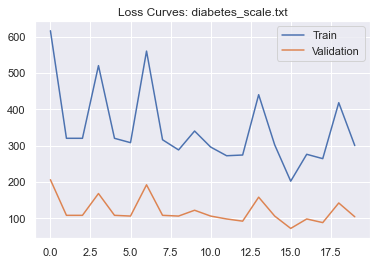

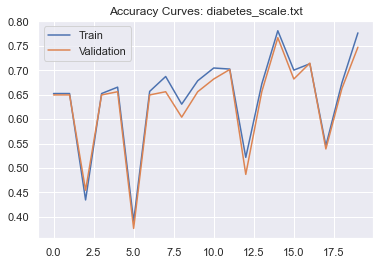

File =  diabetes.txt  test_accuracy =  0.6428571428571429


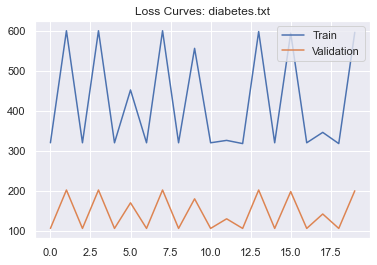

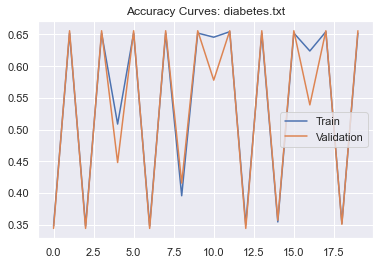

In [116]:
# Experiments
# 1. Different Files (Without scaling vs scaled)
np.random.seed(0)
# weights = np.random.uniform(low = -1, high = 1, size=8).reshape(-1,1)
# weights = np.random.normal(size=8).reshape(-1,1)
weights = np.random.rand(8,1)
for file_path in ['diabetes_scale.txt','diabetes.txt']:
    perceptron = Perceptron(
        file_path=file_path,
        weights=weights, 
        # loss_function_name="zero_one_loss", 
        # loss_function_name="perceptron_loss",
        # loss_function_name="normal_loss",
        loss_function_name="normal_absolute_loss",
        # loss_function_name="mean_squared_error_loss",
        learning_rate=0.01, 
        epoch=20)
    X, y = perceptron.get_features_labels_from_file_data()
    X_train, X_val, X_test, y_train, y_val, y_test = perceptron.split_train_validation_test(X, y)
    train_data = perceptron.train(X_train, y_train, X_val, y_val)
    test_accuracy = perceptron.accuracy(X_test, y_test)
    print('File = ', file_path, ' test_accuracy = ', test_accuracy)
    # train_data_pd = pd.DataFrame(train_data)
    # print(train_data_pd)
    perceptron.plot_loss_curves(file_path)
    perceptron.plot_accuracy_curves(file_path)

Bias Value  [0.09273255]
File =  diabetes_scale.txt  test_accuracy =  0.6428571428571429


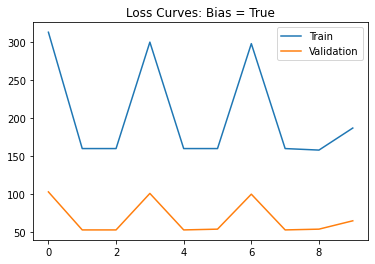

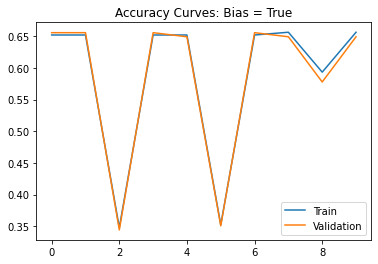

In [43]:
# Experiments
# 1. Different Files (Without scaling vs scaled)
np.random.seed(0)
# weights = np.random.uniform(low = -1, high = 1, size=8).reshape(-1,1)
# weights = np.random.normal(size=8).reshape(-1,1)
weights = np.random.rand(8,1)
for file_path in ['diabetes_scale.txt']:
    perceptron = Perceptron(
        file_path=file_path,
        weights=weights, 
        loss_function_name="zero_one_loss", 
        learning_rate=0.01, 
        epoch=10,
        add_bias=True)
    X, y = perceptron.get_features_labels_from_file_data()
    X_train, X_val, X_test, y_train, y_val, y_test = perceptron.split_train_validation_test(X, y)
    train_data = perceptron.train(X_train, y_train, X_val, y_val)
    X_test = perceptron.add_bias_in_features(X_test)
    test_accuracy = perceptron.accuracy(X_test, y_test)
    print('File = ', file_path, ' test_accuracy = ', test_accuracy)
    # train_data_pd = pd.DataFrame(train_data)
    # print(train_data_pd)

    perceptron.plot_loss_curves('Bias = True')
    perceptron.plot_accuracy_curves('Bias = True')

Learning Rate =  0.1  test_accuracy =  0.6493506493506493


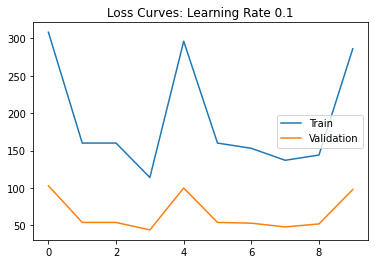

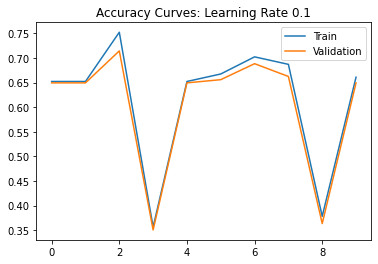

Learning Rate =  0.01  test_accuracy =  0.6493506493506493


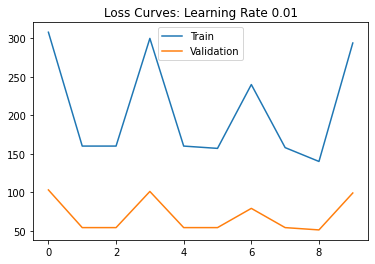

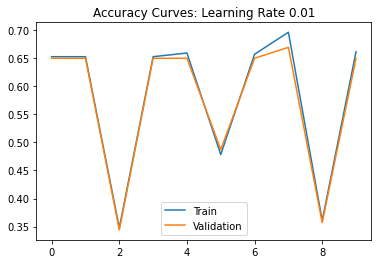

Learning Rate =  0.02  test_accuracy =  0.6818181818181818


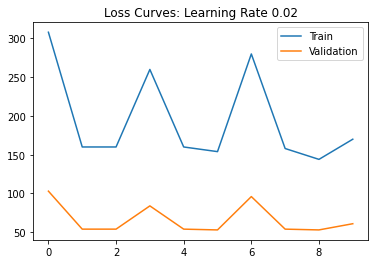

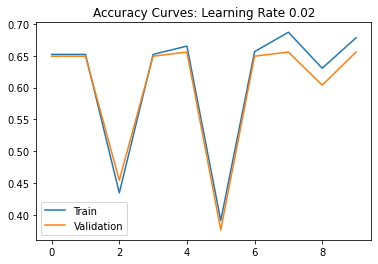

Learning Rate =  0.028  test_accuracy =  0.7272727272727273


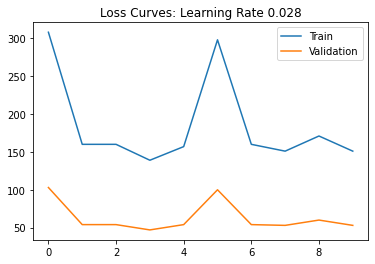

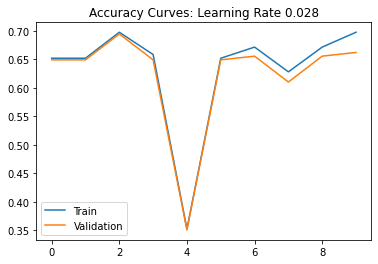

Learning Rate =  0.029  test_accuracy =  0.7727272727272727


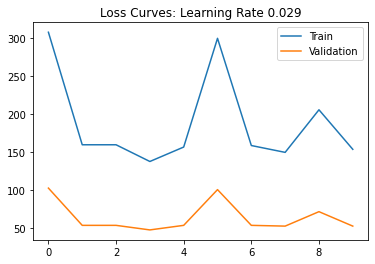

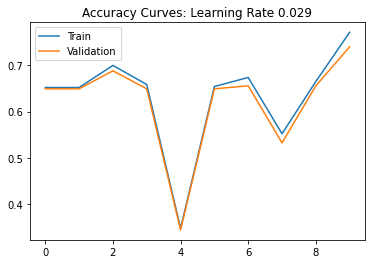

Learning Rate =  0.03  test_accuracy =  0.7012987012987013


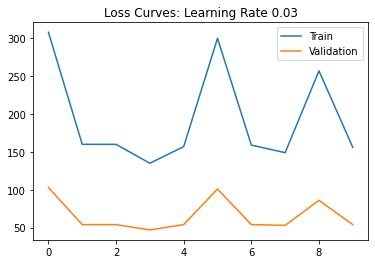

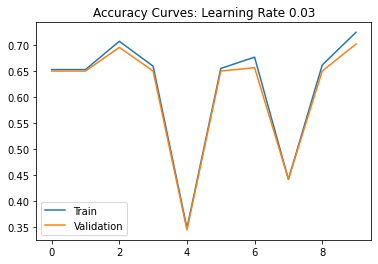

Learning Rate =  0.033  test_accuracy =  0.6883116883116883


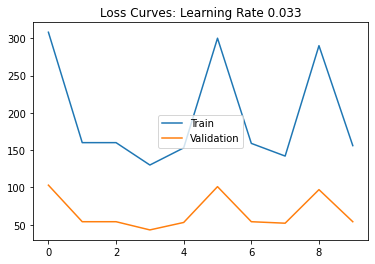

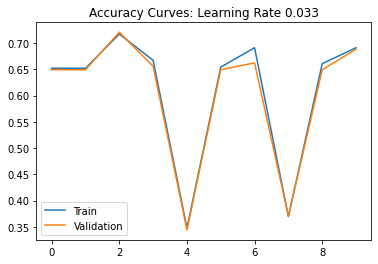

Learning Rate =  0.035  test_accuracy =  0.6883116883116883


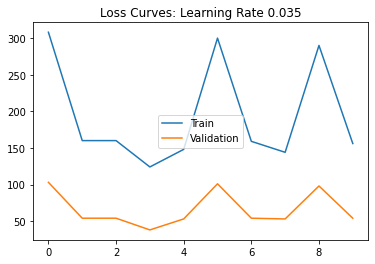

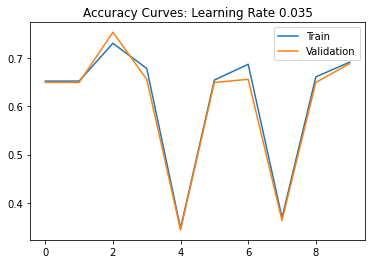

Learning Rate =  0.037  test_accuracy =  0.6883116883116883


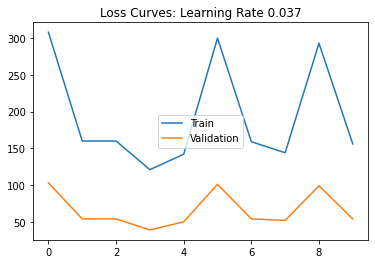

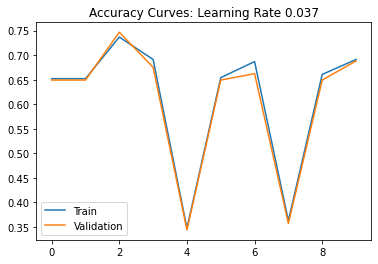

Learning Rate =  0.04  test_accuracy =  0.6948051948051948


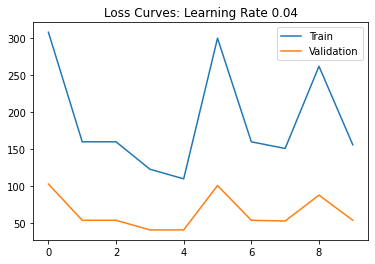

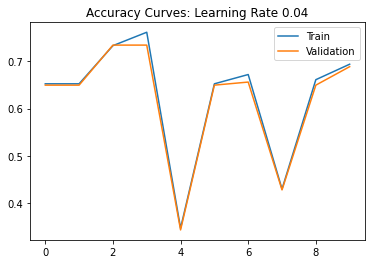

Learning Rate =  0.05  test_accuracy =  0.6883116883116883


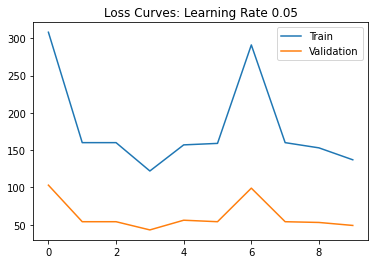

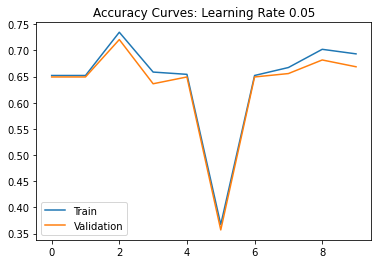

Learning Rate =  0.06  test_accuracy =  0.564935064935065


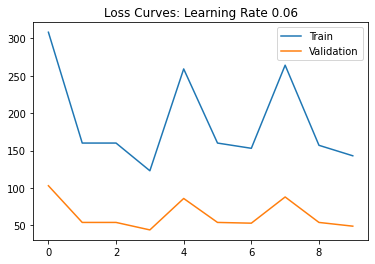

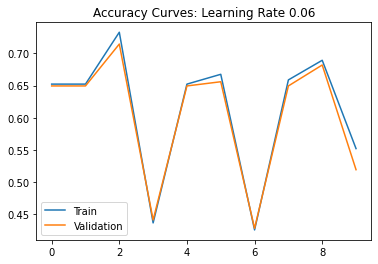

Learning Rate =  0.001  test_accuracy =  0.43506493506493504


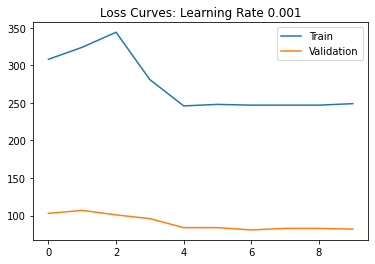

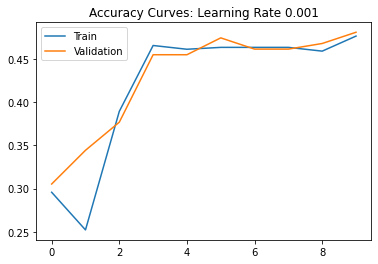

Learning Rate =  0.0001  test_accuracy =  0.3051948051948052


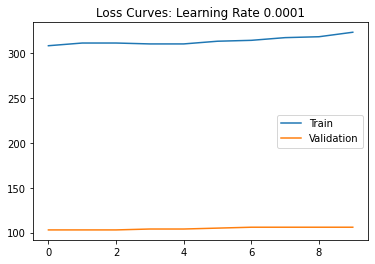

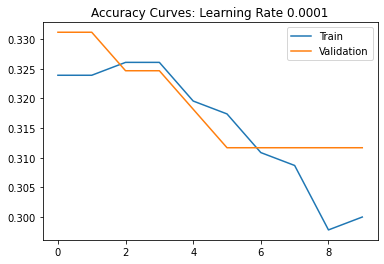

In [44]:
# 2. Learning Rate
np.random.seed(0)
# weights = np.random.uniform(low = -1, high = 1, size=8).reshape(-1,1)
# weights = np.random.normal(size=8).reshape(-1,1)
weights = np.random.rand(8,1)
for learning_rate in [0.1,0.01,0.02,0.028,0.029,0.03,0.033,0.035,0.037,0.04,0.05,0.06,0.001,0.0001]:
    perceptron = Perceptron(
        file_path='diabetes_scale.txt',
        weights=weights, 
        loss_function_name="zero_one_loss", 
        learning_rate=learning_rate, 
        epoch=10)
    X, y = perceptron.get_features_labels_from_file_data()
    X_train, X_val, X_test, y_train, y_val, y_test = perceptron.split_train_validation_test(X, y)
    train_data = perceptron.train(X_train, y_train, X_val, y_val)
    test_accuracy = perceptron.accuracy(X_test, y_test)
    print('Learning Rate = ', learning_rate, ' test_accuracy = ', test_accuracy)
    title_suffix = 'Learning Rate ' + str(learning_rate)
    perceptron.plot_loss_curves(title_suffix)
    perceptron.plot_accuracy_curves(title_suffix)

Epoch =  10  test_accuracy =  0.7727272727272727


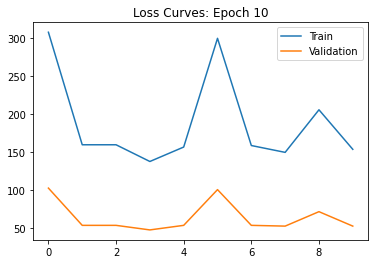

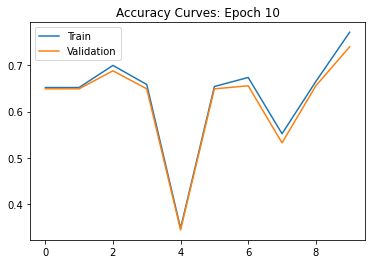

Epoch =  20  test_accuracy =  0.6623376623376623


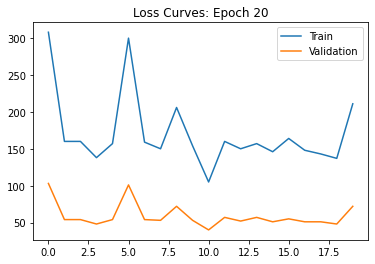

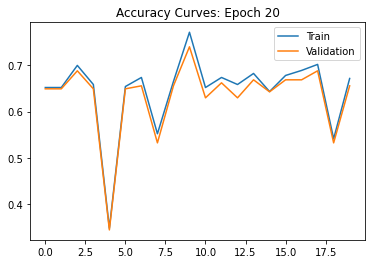

Epoch =  30  test_accuracy =  0.6623376623376623


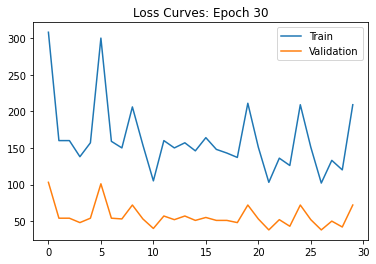

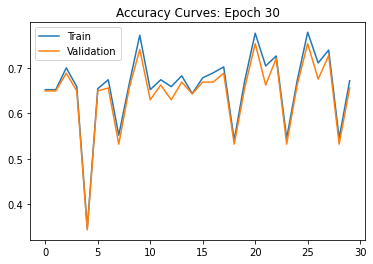

Epoch =  40  test_accuracy =  0.6688311688311688


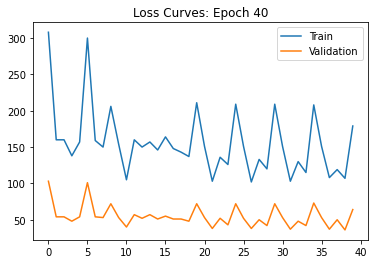

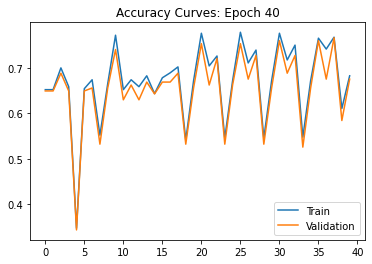

Epoch =  50  test_accuracy =  0.7402597402597403


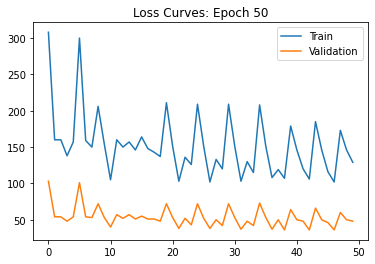

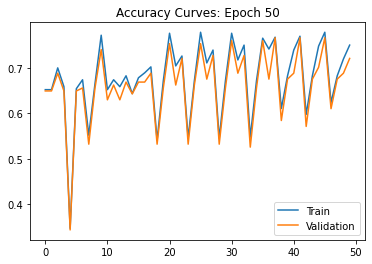

Epoch =  60  test_accuracy =  0.7727272727272727


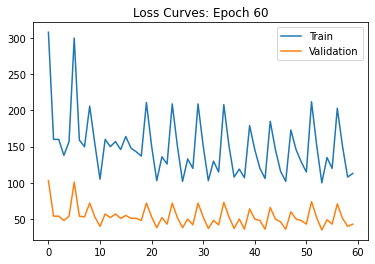

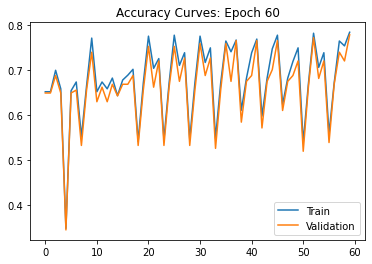

Epoch =  70  test_accuracy =  0.7272727272727273


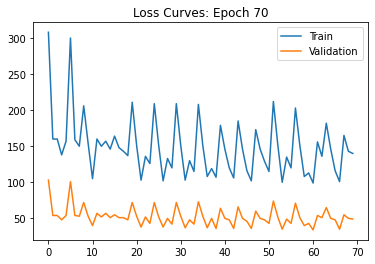

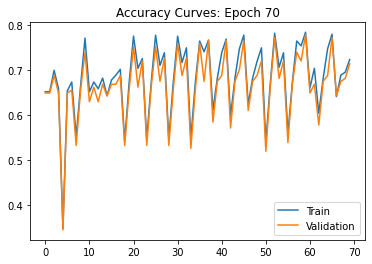

Epoch =  80  test_accuracy =  0.7987012987012987


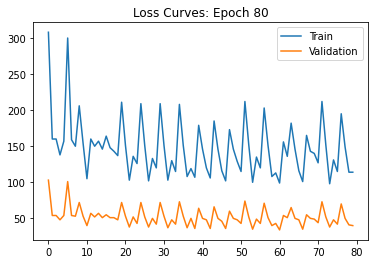

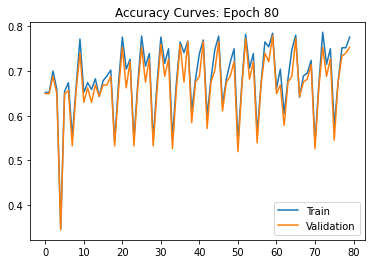

Epoch =  90  test_accuracy =  0.7727272727272727


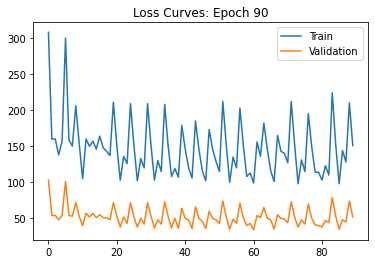

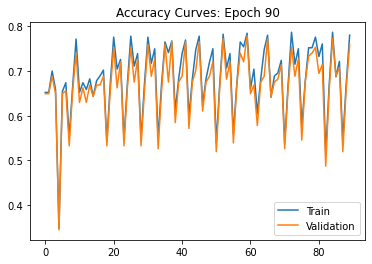

In [45]:
# 3. Epoch
np.random.seed(0)
# weights = np.random.uniform(low = -1, high = 1, size=8).reshape(-1,1)
# weights = np.random.normal(size=8).reshape(-1,1)
weights = np.random.rand(8,1)
for epoch in range(10, 100, 10):
    perceptron = Perceptron(
        file_path='diabetes_scale.txt',
        weights=weights, 
        loss_function_name="zero_one_loss", 
        learning_rate=0.029, 
        epoch=epoch)
    X, y = perceptron.get_features_labels_from_file_data()
    X_train, X_val, X_test, y_train, y_val, y_test = perceptron.split_train_validation_test(X, y)
    train_data = perceptron.train(X_train, y_train, X_val, y_val)
    test_accuracy = perceptron.accuracy(X_test, y_test)
    print('Epoch = ', epoch, ' test_accuracy = ', test_accuracy)
    title_suffix = 'Epoch ' + str(epoch)
    perceptron.plot_loss_curves(title_suffix)
    perceptron.plot_accuracy_curves(title_suffix)

Random Seed =  0  test_accuracy =  0.7987012987012987


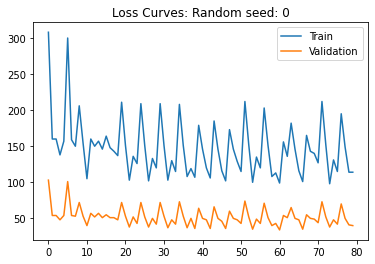

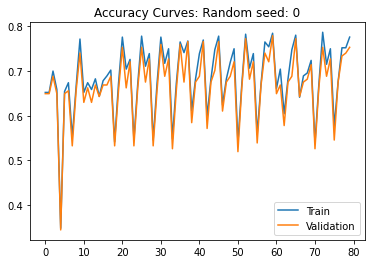

Random Seed =  10  test_accuracy =  0.7792207792207793


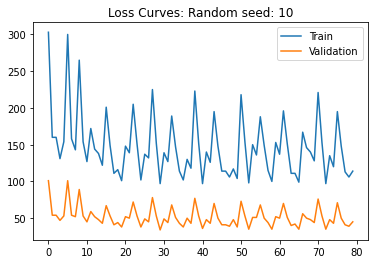

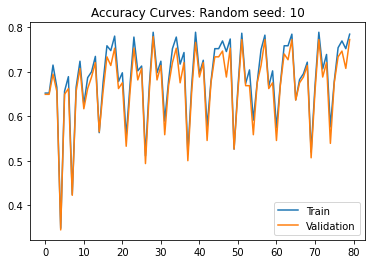

Random Seed =  20  test_accuracy =  0.7272727272727273


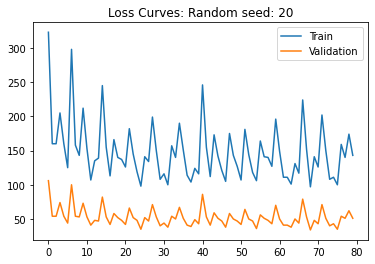

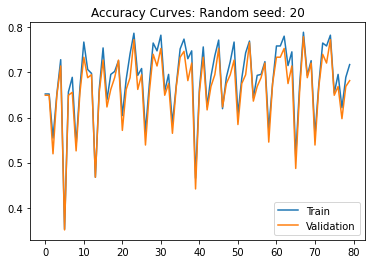

Random Seed =  30  test_accuracy =  0.7402597402597403


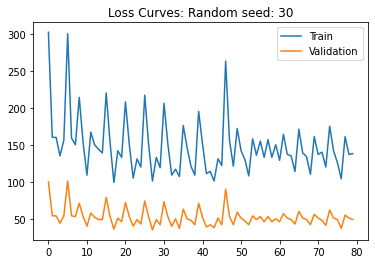

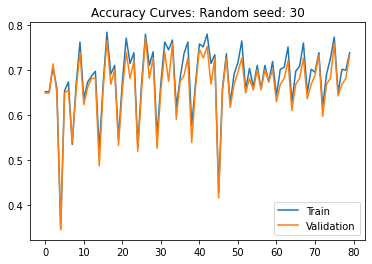

Random Seed =  40  test_accuracy =  0.7857142857142857


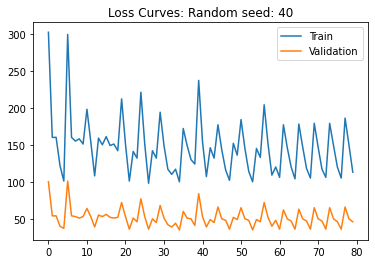

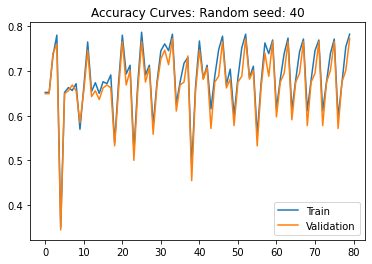

Random Seed =  50  test_accuracy =  0.5974025974025974


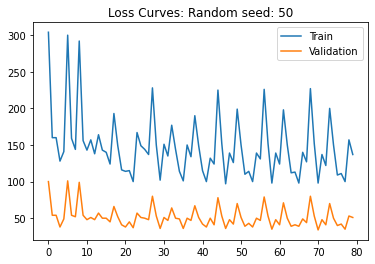

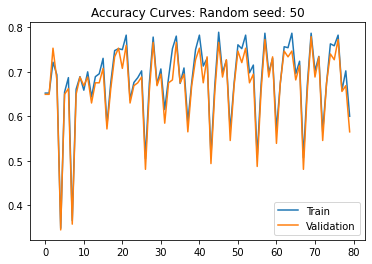

Random Seed =  60  test_accuracy =  0.6363636363636364


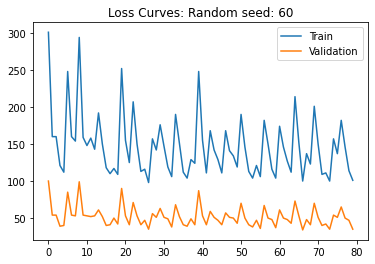

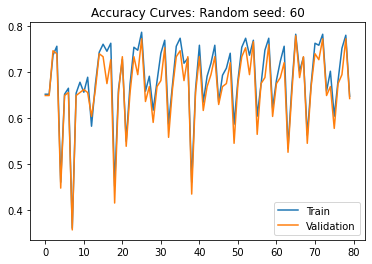

Random Seed =  70  test_accuracy =  0.6623376623376623


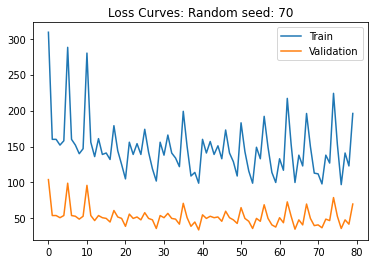

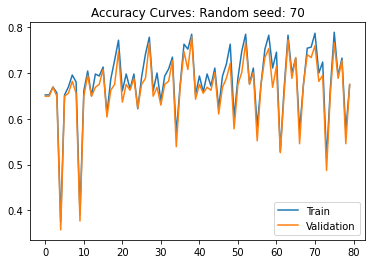

Random Seed =  80  test_accuracy =  0.7662337662337663


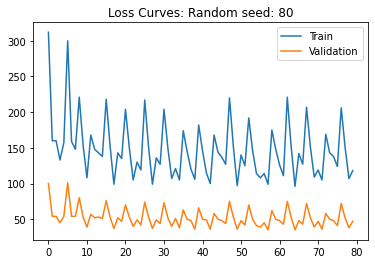

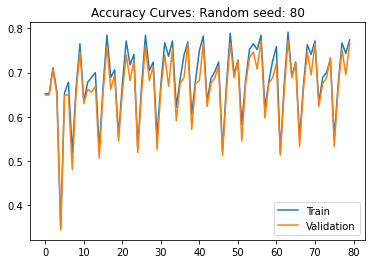

Random Seed =  90  test_accuracy =  0.7467532467532467


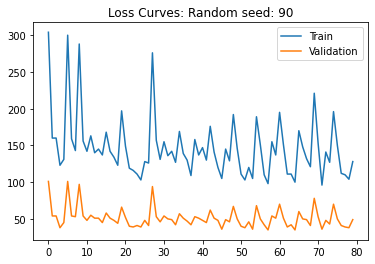

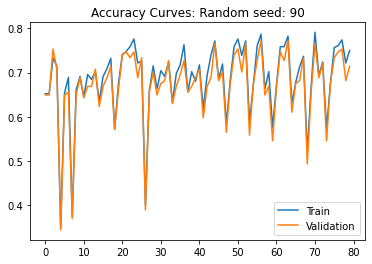

In [46]:
# 4. Weights
# low,high pair
#  [(-1,1), (0,1), (-2,2),(-0.5,0.5),(0,0)]
# weights_pairs = [(-1,1), (0,1), (-2,2),(-0.5,0.5),(0,0)]
random_seeds = range(0,100,10)
for random_seed in random_seeds:
    np.random.seed(random_seed)
    # low, high = weight_pair
    # weights = np.random.uniform(low=low, high = high, size=8).reshape(-1,1)
    # weights = np.random.normal(size=8).reshape(-1,1)
    weights = np.random.rand(8,1)
    perceptron = Perceptron(
        file_path='diabetes_scale.txt',
        weights=weights, 
        loss_function_name="zero_one_loss", 
        learning_rate=0.029, 
        epoch=80)
    X, y = perceptron.get_features_labels_from_file_data()
    X_train, X_val, X_test, y_train, y_val, y_test = perceptron.split_train_validation_test(X, y)
    train_data = perceptron.train(X_train, y_train, X_val, y_val)
    test_accuracy = perceptron.accuracy(X_test, y_test)
    print('Random Seed = ', random_seed, ' test_accuracy = ', test_accuracy)
    title_suffix = 'Random seed: ' + str(random_seed)
    perceptron.plot_loss_curves(title_suffix)
    perceptron.plot_accuracy_curves(title_suffix)

Weight =  (-1, 1)  test_accuracy =  0.7987012987012987


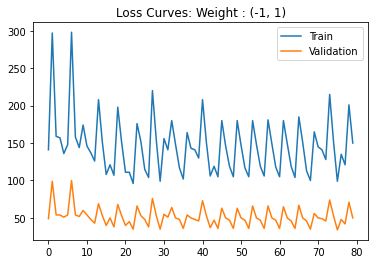

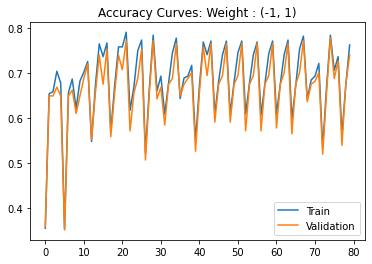

Weight =  (0, 1)  test_accuracy =  0.7857142857142857


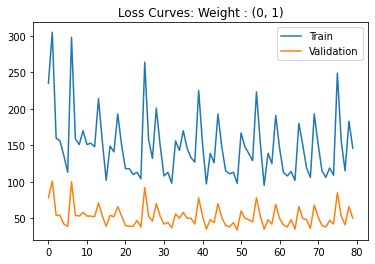

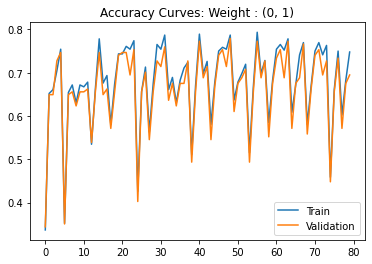

Weight =  (-2, 2)  test_accuracy =  0.7857142857142857


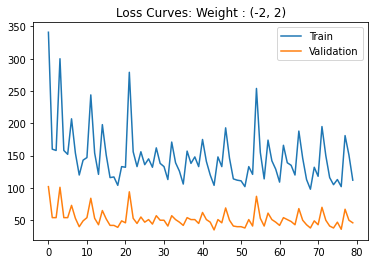

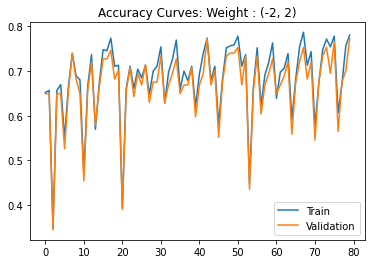

Weight =  (-0.5, 0.5)  test_accuracy =  0.7857142857142857


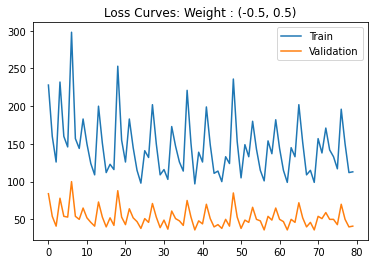

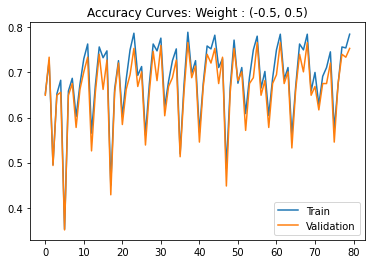

Weight =  (0, 0)  test_accuracy =  0.6623376623376623


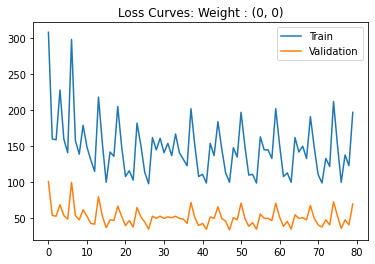

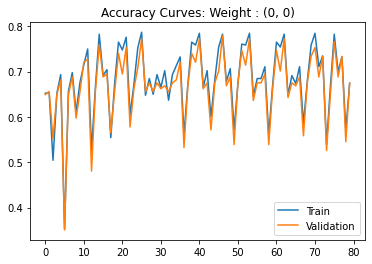

In [47]:
# 4.1 Weights
# low,high pair
#  [(-1,1), (0,1), (-2,2),(-0.5,0.5),(0,0)]
weights_pairs = [(-1,1), (0,1), (-2,2),(-0.5,0.5),(0,0)]
random_seeds = range(0)
for weight_pair in weights_pairs:
    low, high = weight_pair
    # weights = np.random.uniform(low=low, high = high, size=8).reshape(-1,1)
    weights = np.random.normal(size=8).reshape(-1,1)
    # weights = np.random.rand(8,1)
    perceptron = Perceptron(
        file_path='diabetes_scale.txt',
        weights=weights, 
        loss_function_name="zero_one_loss", 
        learning_rate=0.029, 
        epoch=80)
    X, y = perceptron.get_features_labels_from_file_data()
    X_train, X_val, X_test, y_train, y_val, y_test = perceptron.split_train_validation_test(X, y)
    train_data = perceptron.train(X_train, y_train, X_val, y_val)
    test_accuracy = perceptron.accuracy(X_test, y_test)
    print('Weight = ', weight_pair, ' test_accuracy = ', test_accuracy)
    title_suffix = 'Weight : ' + str(weight_pair)
    perceptron.plot_loss_curves(title_suffix)
    perceptron.plot_accuracy_curves(title_suffix)

In [48]:
print(np.random.uniform(low=0, high = 0, size=8).reshape(-1,1))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [58]:
x = np.array([[1,2,3],[2,3,4]])
print('x shape: ', x.shape, ', a: \n', x)

b = np.ones((x.shape[0],1))
print('b shape: ', b.shape, ', b: \n', b)

x = np.append(b, x, axis=1)
print('x shape: ', x.shape, ', c = \n', x)


x shape:  (2, 3) , a: 
 [[1 2 3]
 [2 3 4]]
b shape:  (2, 1) , b: 
 [[1.]
 [1.]]
x shape:  (2, 4) , c = 
 [[1. 1. 2. 3.]
 [1. 2. 3. 4.]]


In [50]:
x1 = np.array([[1],[2],[3]])
print('x shape: ', x1.shape, ', x: \n', x1.shape)

b1 = np.array([[1]])
print('b1 shape: ', b1.shape, ', b: \n', b1)

x1 = np.append(b1, x1, axis=0)
print('x shape: ', x1.shape, ', c = \n', x1)

x shape:  (3, 1) , x: 
 (3, 1)
b1 shape:  (1, 1) , b: 
 [[1]]
x shape:  (4, 1) , c = 
 [[1]
 [1]
 [2]
 [3]]


In [51]:
# np.random.seed(0)
# print(np.random.uniform(low=-.1,high=.1, size=1))

weights = np.zeros(shape=(8,1))
print(weights)
print(weights.shape)


[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
(8, 1)


File =  diabetes_scale.txt  test_accuracy =  0.7727272727272727


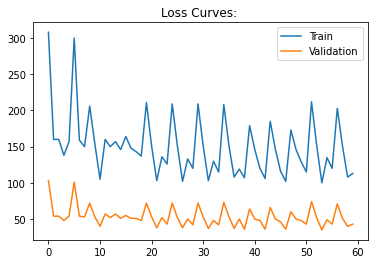

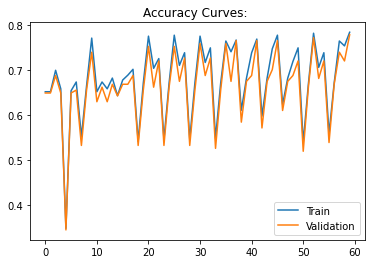

In [52]:
# Experiments
# 1. Different Files (Without scaling vs scaled)
np.random.seed(0)
# weights = np.random.uniform(low = -1, high = 1, size=8).reshape(-1,1)
# weights = np.random.normal(size=8).reshape(-1,1)
weights = np.random.rand(8,1)
# weights = np.zeros(shape=(8,1))
for file_path in ['diabetes_scale.txt']:
    perceptron = Perceptron(
        file_path=file_path,
        weights=weights, 
        loss_function_name="zero_one_loss", 
        learning_rate=0.029, 
        epoch=60)
    X, y = perceptron.get_features_labels_from_file_data()
    X_train, X_val, X_test, y_train, y_val, y_test = perceptron.split_train_validation_test(X, y)
    train_data = perceptron.train(X_train, y_train, X_val, y_val)
    test_accuracy = perceptron.accuracy(X_test, y_test)
    print('File = ', file_path, ' test_accuracy = ', test_accuracy)
    # train_data_pd = pd.DataFrame(train_data)
    # print(train_data_pd)
    title_suffix = ''
    perceptron.plot_loss_curves(title_suffix)
    perceptron.plot_accuracy_curves(title_suffix)

Bias Value  [0.09273255]
File =  diabetes_scale.txt  test_accuracy =  0.8051948051948052


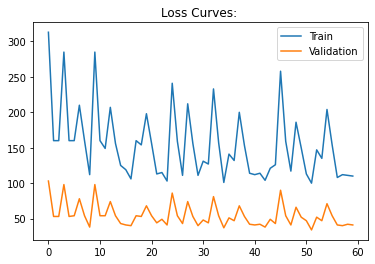

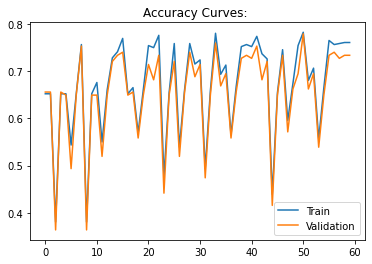

In [53]:
# Experiments
# 1. Different Files (Without scaling vs scaled)
np.random.seed(0)
# weights = np.random.uniform(low = -1, high = 1, size=8).reshape(-1,1)
# weights = np.random.normal(size=8).reshape(-1,1)
weights = np.random.rand(8,1)
for file_path in ['diabetes_scale.txt']:
    perceptron = Perceptron(
        file_path=file_path,
        weights=weights, 
        loss_function_name="zero_one_loss", 
        learning_rate=0.029, 
        epoch=60,
        add_bias=True)
    X, y = perceptron.get_features_labels_from_file_data()
    X_train, X_val, X_test, y_train, y_val, y_test = perceptron.split_train_validation_test(X, y)
    train_data = perceptron.train(X_train, y_train, X_val, y_val)
    X_test = perceptron.add_bias_in_features(X_test)
    test_accuracy = perceptron.accuracy(X_test, y_test)
    print('File = ', file_path, ' test_accuracy = ', test_accuracy)
    # train_data_pd = pd.DataFrame(train_data)
    # print(train_data_pd)
    title_suffix = ''
    perceptron.plot_loss_curves(title_suffix)
    perceptron.plot_accuracy_curves(title_suffix)

In [54]:
np.random.seed(0)
weights = np.random.normal(size=8).reshape(-1,1)
weights

array([[ 1.76405235],
       [ 0.40015721],
       [ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [-0.97727788],
       [ 0.95008842],
       [-0.15135721]])

In [55]:
np.random.seed(0)
weights = np.random.rand(8,1)
weights

array([[0.5488135 ],
       [0.71518937],
       [0.60276338],
       [0.54488318],
       [0.4236548 ],
       [0.64589411],
       [0.43758721],
       [0.891773  ]])